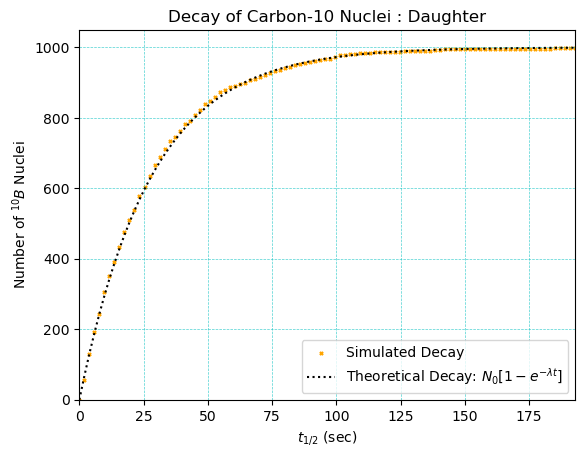

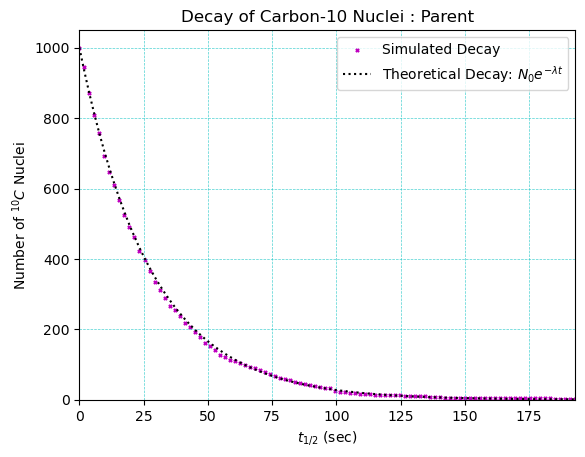

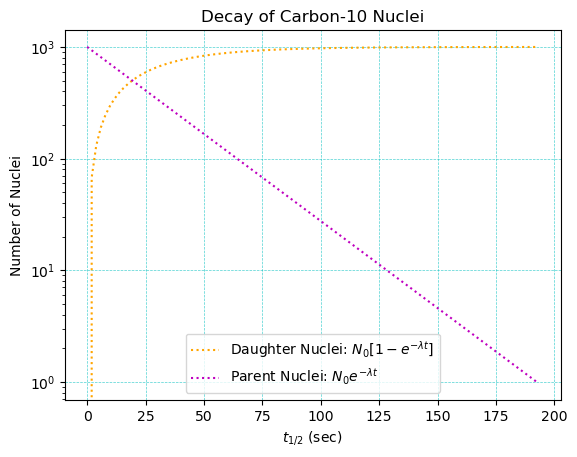

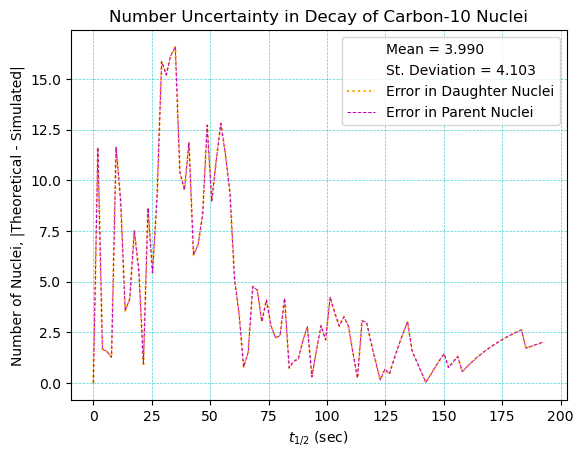

In [12]:
import numpy as np
import random
import matplotlib.pyplot as plt

def my_ran(rate):

    z = random.random()
    return -np.log(1 - z)/rate

N0 = 1000
nuclei_life = []
t_half = 19.3009 # half life of C-10 nuclei
rate = np.log(2)/t_half

for n in range(N0):
    nuclei_life.append(my_ran(rate))

nuclei_life = np.sort(np.array(nuclei_life))
n_half_lives = 10
times = np.linspace(0.0, n_half_lives*t_half, 100)

N_decayed = []
N_undecayed = []

for t in times:
    try: q = np.argwhere(nuclei_life <= t)[-1][0]
    except: q = 0
    N_decayed.append(q)
N_undecayed = N0 - np.array(N_decayed)

residue_daughter = abs(np.array(N_decayed) - np.array(N0 - N0*np.exp(-times*rate)))
residue_parent = abs(np.array(N_undecayed) - np.array(N0*np.exp(-times*rate)))



#################################################################
# Theoretical and Simulated Decay: Formation of Daughter Nuclei #
#################################################################

plt.scatter(times, np.array(N_decayed), s = 5, marker = "x", color = 'orange', label = "Simulated Decay")
plt.plot(times, N0 - N0*np.exp(-times*rate), ls = ":", color = "k", label = r"Theoretical Decay: $N_0[1-e^{-\lambda t}]$")
plt.grid(color = 'c', alpha = 0.7, linestyle = 'dashed', linewidth = 0.5)
plt.xlabel(r"$t_{1/2}$ (sec)")
plt.ylabel(r"Number of $^{10}B$ Nuclei")
plt.title('Decay of Carbon-10 Nuclei : Daughter')
plt.xlim(0, n_half_lives*t_half)
plt.ylim(0,)
plt.legend()
plt.savefig("Formation_Daughter_Nuclei.pdf")
plt.show()

###########################################################
# Theoretical and Simulated Decay: Decay of Parent Nuclei #
###########################################################

plt.scatter(times, np.array(N_undecayed), s = 5, marker = "x", color = 'm',  label = "Simulated Decay")
plt.plot(times, N0*np.exp(-times*rate), ls = ":", color = "k", label = r"Theoretical Decay: $N_0 e^{-\lambda t}$")
plt.grid(color = 'c', alpha = 0.7, linestyle = 'dashed', linewidth = 0.5)
plt.xlabel(r"$t_{1/2}$ (sec)")
plt.ylabel(r"Number of $^{10}C$ Nuclei")
plt.title('Decay of Carbon-10 Nuclei : Parent')
plt.xlim(0, n_half_lives*t_half)
plt.ylim(0,)
plt.legend()
plt.savefig("Decay_Parent_Nuclei.pdf")
plt.show()

######################################
# Parent-daughter Nuclei (Log scale) #
######################################

fig, ax = plt.subplots()
plt.plot(times, N0 - N0*np.exp(-times*rate), ls = ":", color = "orange", label = r"Daughter Nuclei: $N_0[1-e^{-\lambda t}]$")
plt.plot(times, N0*np.exp(-times*rate), ls = ":", color = "m", label = r"Parent Nuclei: $N_0 e^{-\lambda t}$")
plt.grid(color = 'c', alpha = 0.7, linestyle = 'dashed', linewidth = 0.5)
ax.set_yscale('log')
plt.xlabel(r"$t_{1/2}$ (sec)")
plt.ylabel("Number of Nuclei")
plt.title('Decay of Carbon-10 Nuclei')
plt.legend()
plt.savefig("Parent_daughter_Nuclei.pdf")
plt.show()

####################################
# Number Uncertainty in C-10 Decay #
####################################
mean = np.mean(residue_daughter)
stdev = np.std(residue_daughter)
plt.plot([], [], ' ', label = r'Mean = {:.3f}'.format(mean))
plt.plot([], [], ' ', label = r'St. Deviation = {:.3f}'.format(stdev))
plt.plot(times, residue_daughter, color = "orange", ls = ':', label = r"Error in Daughter Nuclei")
plt.plot(times, residue_parent, color = "m", ls = '--', linewidth = '0.7', label = r"Error in Parent Nuclei")
plt.xlabel(r"$t_{1/2}$ (sec)")
plt.ylabel("Number of Nuclei, |Theoretical - Simulated|")
plt.title('Number Uncertainty in Decay of Carbon-10 Nuclei')
plt.grid(color = 'c', alpha = 0.7, linestyle = 'dashed', linewidth = 0.5)
plt.legend()
plt.savefig("Number_Uncertainties_C10_Nuclei.pdf")
plt.show()